In [5]:
import nltk
nltk.download('punkt_tab')
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
import re
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords
russian_stopwords = set(stopwords.words('russian'))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
corpus = open(r"lenta.txt", encoding="utf-8").read()


## Задание 1.

Посчитайте частоты для 5-грамм в корпусе lenta.txt. двумя способами:  
1) lenta.txt -> sent_tokenize (russian) -> word_tokenize -> ngrammer  
2) lenta.txt -> word_tokenize(preserve_line=True) - ngrammer  
    
Проанализируйте топ-20 самых частотных нграмм и проверьте есть ли различия? 
-Да, различия есть :)

In [7]:
def ngrammer(tokens, n=2, stops=set()):
    ngrams = []
    tokens = [token for token in tokens if token not in stops]
    for i in range(len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams

def fivegram_counter(sentences):
    fivegram_counts = Counter()
    for sentence in sentences:
        fivegram_counts.update(ngrammer([token for token in sentence if token not in russian_stopwords],5))
    return fivegram_counts.most_common(20)
    

In [8]:
tokenized_sentences1 = sent_tokenize(corpus, language='russian')
tokenized_sentences1 = [word_tokenize(sentence) for sentence in tokenized_sentences1]
tokenized_sentences1 = [[token.lower() for token in sentence if not re.match('\W+', token)] 
                       for sentence in tokenized_sentences1]
res1 = fivegram_counter(tokenized_sentences1)
res1

<>:3: SyntaxWarning: invalid escape sequence '\W'
<>:3: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Alex\AppData\Local\Temp\ipykernel_9708\1418818188.py:3: SyntaxWarning: invalid escape sequence '\W'
  tokenized_sentences1 = [[token.lower() for token in sentence if not re.match('\W+', token)]


[('объединенной группировки войск северном кавказе', 83),
 ('сообщает риа новости ссылкой пресс-службу', 57),
 ('обязанности президента россии владимир путин', 47),
 ('группировки федеральных сил северном кавказе', 37),
 ('помощник президента россии сергей ястржембский', 35),
 ('делам печати телерадиовещания средств массовых', 31),
 ('объединенной группировки федеральных сил северном', 31),
 ('печати телерадиовещания средств массовых коммуникаций', 30),
 ('штабе объединенной группировки федеральных сил', 25),
 ('министр иностранных дел россии игорь', 24),
 ('первый заместитель начальника генерального штаба', 23),
 ('сообщает риа новости ссылкой источники', 23),
 ('объединенной группировкой войск северном кавказе', 23),
 ('иностранных дел россии игорь иванов', 23),
 ('прямом эфире радиостанции эхо москвы', 20),
 ('главного управления борьбе организованной преступностью', 20),
 ('начальника генерального штаба вооруженных сил', 20),
 ('заместитель начальника генштаба вооруженных сил', 20)

In [9]:
tokenized_sentences2 = word_tokenize(corpus, preserve_line = True)
tokenized_sentences2 = [token.lower() for token in tokenized_sentences2 if not re.match(r'\W+', token)]
res2 = fivegram_counter([tokenized_sentences2])
res2

[('сообщает риа новости ссылкой пресс-службу', 57),
 ('объединенной группировки войск северном кавказе', 56),
 ('обязанности президента россии владимир путин', 46),
 ('делам печати телерадиовещания средств массовых', 31),
 ('объединенной группировки федеральных сил северном', 31),
 ('печати телерадиовещания средств массовых коммуникаций', 29),
 ('объединенной группировки войск северном кавказе.', 27),
 ('министр иностранных дел россии игорь', 24),
 ('штабе объединенной группировки федеральных сил', 24),
 ('первый заместитель начальника генерального штаба', 23),
 ('сообщает риа новости ссылкой источники', 23),
 ('объединенной группировкой войск северном кавказе', 23),
 ('помощник президента россии сергей ястржембский', 21),
 ('прямом эфире радиостанции эхо москвы', 20),
 ('начальника генерального штаба вооруженных сил', 20),
 ('группировки федеральных сил северном кавказе', 20),
 ('заместитель начальника генштаба вооруженных сил', 20),
 ('сообщает федеральное агентство новостей ссылкой'

## Задание 2.

Найдите какую-то инетересную (по вашему мнению) закономерность на https://books.google.com/ngrams/ для русского языка (с 1990 по 2022)

Вставьте сюда скриншот

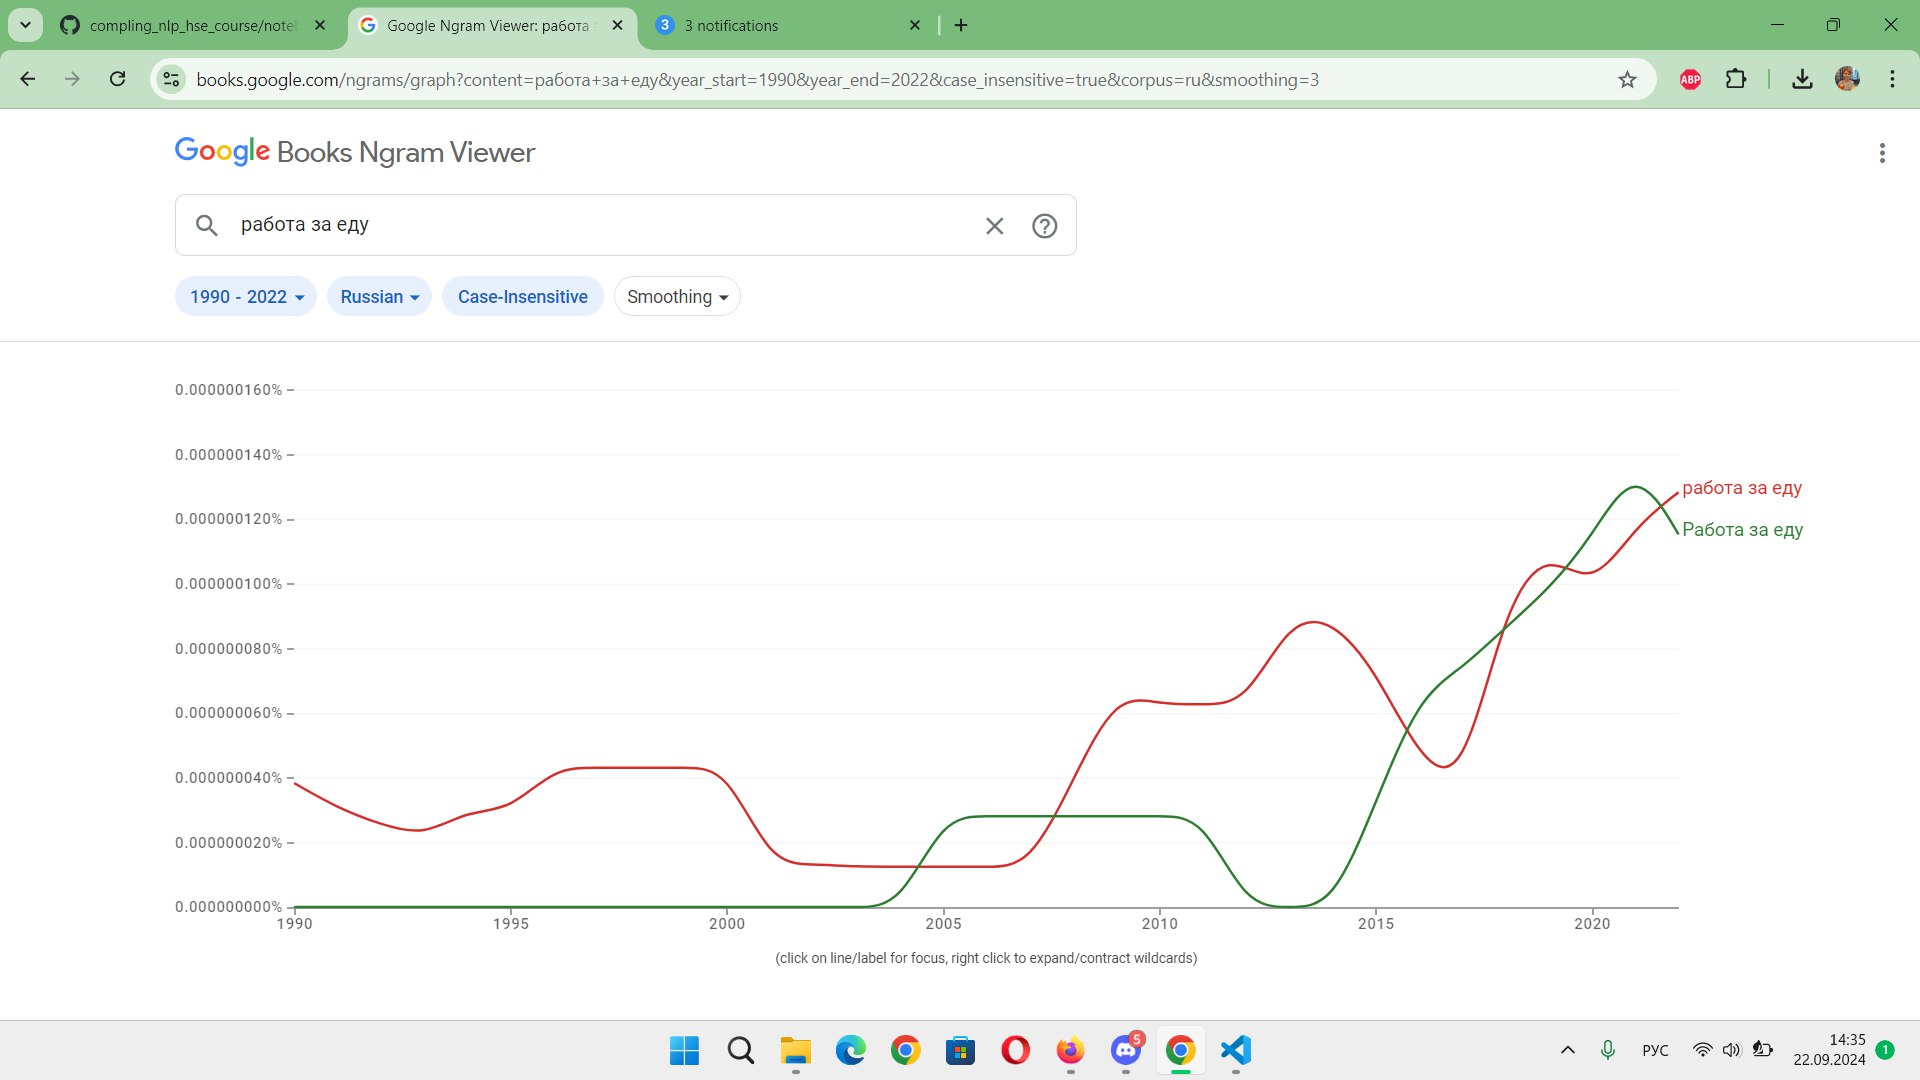

## Заданиe 3

Когда мы разбирали PMI мы использовали такую функцию:

In [10]:
import numpy

In [11]:
def scorer_simple(word_count_a, word_count_b, bigram_count, min_count=0):

    try:
        score1 = (bigram_count - min_count) / (word_count_a * word_count_b)
    except ZeroDivisionError:
        return 0
    
    return score1

def scorer_hard(word_count_a, word_count_b, bigram_count, min_count=0, *args):
    p_bigram_counts = (bigram_count - min_count)/len(bigrams)
    p_word_count_a = word_count_a/len_vocab
    p_word_count_b = word_count_b/len_vocab
    try:
        score2 = numpy.log2((p_bigram_counts/p_word_count_b)/p_word_count_a)
    except ZeroDivisionError:
        return 0
    return score2

def collect_stats(corpus, stops):
    
    unigrams = Counter()
    bigrams = Counter()
    
    for sent in corpus:
        unigrams.update(sent)
        bigrams.update(ngrammer(sent, 2, stops))
    
    return unigrams, bigrams

def score_bigrams(unigrams, bigrams, scorer, threshold=-1000, min_count=0):
    bigram2score = Counter()

    for bigram in bigrams:

        word_a, word_b = bigram.split()
        score = scorer(unigrams[word_a], unigrams[word_b], bigrams[bigram], min_count)
        
        if score > threshold:
            bigram2score[bigram] = score


    return bigram2score

Но если вы посмотрите на определение в википедии, то увидите, что формула немного другая ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/094243d23c19d2d032f6bb26c4dc4f47d98d32f8)

Перепишите функцию, чтобы она точно соответствовала этому определению. Расчитайте PMI для всех биграммов также как мы делали в семинаре с помощью функции score_bigrams используя изначальный scorer и обновленный. Посмотрите есть ли разница в топ-10 биграммов. Подумайте почему результаты совпадают/отличаются?

*Подсказка: для вероятностей можно поделить на количество слов в корпусе

In [12]:
unigrams, bigrams = collect_stats(tokenized_sentences1, russian_stopwords)

In [13]:
len_vocab = len(unigrams)

bigram2score1 = score_bigrams(unigrams, bigrams, scorer_simple, min_count = 20)
bigram2score1.most_common(10)

[('wall street', 0.011396011396011397),
 ('саудовской аравии', 0.011302795954788817),
 ('street journal', 0.010030864197530864),
 ('dow jones', 0.009852216748768473),
 ('подписных листов', 0.009538950715421303),
 ('следственном изоляторе', 0.009387351778656126),
 ('чрезвычайным ситуациям', 0.008906379453189726),
 ('france presse', 0.0087890625),
 ('персидском заливе', 0.008754208754208754),
 ('полевые командиры', 0.00875)]

In [14]:
bigram2score2 = score_bigrams(unigrams, bigrams, scorer_hard, min_count = 20)
bigram2score2.most_common(15)

C:\Users\Alex\AppData\Local\Temp\ipykernel_9708\1710543040.py:15: RuntimeWarning: invalid value encountered in log2
  score2 = numpy.log2((p_bigram_counts/p_word_count_b)/p_word_count_a)
C:\Users\Alex\AppData\Local\Temp\ipykernel_9708\1710543040.py:15: RuntimeWarning: divide by zero encountered in log2
  score2 = numpy.log2((p_bigram_counts/p_word_count_b)/p_word_count_a)


[('wall street', 7.975908928043524),
 ('саудовской аравии', 7.964059652555503),
 ('street journal', 7.7918258636045525),
 ('dow jones', 7.765900231162909),
 ('подписных листов', 7.719282442189952),
 ('следственном изоляторе', 7.69617008709736),
 ('чрезвычайным ситуациям', 7.620290942295162),
 ('france presse', 7.601161149790397),
 ('персидском заливе', 7.595428650801049),
 ('полевые командиры', 7.594734880630964),
 ('полевых командиров', 7.495776400542796),
 ('налогам сборам', 7.492636693012228),
 ('следственный изолятор', 7.431236148348085),
 ('великой отечественной', 7.420288512082774),
 ('exit polls', 7.40886833531963)]

## Задание 4*

Обновите функцию получившуюся в предыдущем задании так, чтобы вместо произведения/деления вероятностей использовались сложение и вычитание логирифмов. 

In [15]:
def scorer_hard(word_count_a, word_count_b, bigram_count, min_count=0, *args):
    p_bigram_counts = (bigram_count - min_count)/len(bigrams)
    p_word_count_a = word_count_a/len_vocab
    p_word_count_b = word_count_b/len_vocab
    try:
        score2 = numpy.log2(p_bigram_counts) - (numpy.log2(p_word_count_b) + numpy.log2(p_word_count_a))
    except ZeroDivisionError:
        return 0
    return score2

In [16]:
bigram2score2 = score_bigrams(unigrams, bigrams, scorer_hard, min_count = 20)
bigram2score2.most_common(15)

C:\Users\Alex\AppData\Local\Temp\ipykernel_9708\158586236.py:6: RuntimeWarning: invalid value encountered in log2
  score2 = numpy.log2(p_bigram_counts) - (numpy.log2(p_word_count_b) + numpy.log2(p_word_count_a))
C:\Users\Alex\AppData\Local\Temp\ipykernel_9708\158586236.py:6: RuntimeWarning: divide by zero encountered in log2
  score2 = numpy.log2(p_bigram_counts) - (numpy.log2(p_word_count_b) + numpy.log2(p_word_count_a))


[('wall street', 7.975908928043525),
 ('саудовской аравии', 7.964059652555504),
 ('street journal', 7.791825863604554),
 ('dow jones', 7.7659002311629095),
 ('подписных листов', 7.719282442189954),
 ('следственном изоляторе', 7.696170087097359),
 ('чрезвычайным ситуациям', 7.62029094229516),
 ('france presse', 7.6011611497904),
 ('персидском заливе', 7.5954286508010505),
 ('полевые командиры', 7.594734880630966),
 ('полевых командиров', 7.4957764005427965),
 ('налогам сборам', 7.49263669301223),
 ('следственный изолятор', 7.431236148348084),
 ('великой отечественной', 7.420288512082772),
 ('exit polls', 7.408868335319632)]

## Задание 5

Исследуйте gensim.models.Phrases. Проверьте сколько дефолтных scoring функций есть в этом классе. Попробуйте все доступные по умолчанию scoring функции и попробуйте настраивать для них значение threshold и min_count. Попробуйте сделать так, чтобы собиралось как можно больше нграммов. Попробуйте строить последовательность gensim.models.Phrases, чтобы строить более длинные нграммы

In [29]:
import gensim
from gensim.models import Phrases

In [40]:
#с gensim разобралась не до конца, но в какой-то мере задание сделала

bi_ph1 = Phrases(tokenized_sentences1, min_count=5, threshold=1, scoring='default')

tri_ph1 = Phrases(bi_ph1[tokenized_sentences1], min_count=5, threshold=1, scoring='default')

p1 = gensim.models.phrases.Phraser(tri_ph1)

p1[tokenized_sentences1[3]]


['с',
 'раннего',
 'утра',
 '14_сентября',
 'огонь',
 'достиг',
 'значительного',
 'напряжения']

In [44]:
bi_ph2 = Phrases(tokenized_sentences1, min_count=2, threshold=1, scoring='npmi')
tri_ph2 = Phrases(bi_ph2[tokenized_sentences1], min_count=2, threshold=1, scoring='npmi')
p2 = gensim.models.phrases.Phraser(tri_ph2)
p2[tokenized_sentences1[3]]

['с',
 'раннего',
 'утра',
 '14',
 'сентября',
 'огонь',
 'достиг',
 'значительного',
 'напряжения']